In [190]:
import requests
import bs4
import os
import re
import unicodedata
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import acquire as a
import prepare as prep
import utilities as util

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import json
from typing import Dict, List, Optional, Union, cast


import sys
sys.path.insert(1, '/Users/matthewdalton/')
from env import github_token, github_username

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
    #import to be able to do decision tress
from sklearn.neighbors import KNeighborsClassifier
    #import to be able to do KNN
from sklearn.linear_model import LogisticRegression
    #import to be able to do logistic regression
from sklearn.ensemble import RandomForestClassifier
    #import to be able to do random forest
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

In [2]:
# url = ('https://github.com/microsoft?q=&type=&language=&sort=stargazers')
# response = requests.get(url)
# html = response.text
# soup = bs4.BeautifulSoup(html)

In [3]:
REPOS = []

In [4]:
# for n in range(0,30):
#     REPOS.append(soup.select('h3')[n].text)
#     REPOS = list(set(REPOS))

In [5]:
# i = 2
# while i < 80:
#     url = 'https://github.com/microsoft?language=&page=' + str(i) + '&sort=stargazers&type='
#     response = requests.get(url)
#     html = response.text
#     soup = bs4.BeautifulSoup(html)
    
#     for n in range(0,30):
#         REPOS.append(soup.select('h3')[n].text)
#         REPOS = list(set(REPOS))
        
#     i += 1

In [6]:
# regexp = r'[\n]+\s+'
# subject = REPOS[0]


# re.sub(regexp, '', subject)

In [7]:
# repos = pd.Series(REPOS)

In [8]:
# repos = repos.str.replace(regexp, "", regex=True)

In [9]:
# repos = repos.str.replace('Archived\n', '').str.replace('\n', '')

In [10]:
# REPOS = list('microsoft/' + repos)

In [11]:
# REPOS

In [12]:
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests

import sys
sys.path.insert(1, '/Users/matthewdalton/')

from env import github_token, github_username


headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

if headers["Authorization"] == "token " or headers["User-Agent"] == "":
    raise Exception(
        "You need to follow the instructions marked TODO in this script before trying to use it"
    )


def github_api_request(url: str) -> Union[List, Dict]:
    response = requests.get(url, headers=headers)
    response_data = response.json()
    if response.status_code != 200:
        raise Exception(
            f"Error response from github api! status code: {response.status_code}, "
            f"response: {json.dumps(response_data)}"
        )
    return response_data


def get_repo_language(repo: str) -> str:
    url = f"https://api.github.com/repos/{repo}"
    repo_info = github_api_request(url)
    if type(repo_info) is dict:
        repo_info = cast(Dict, repo_info)
        if "language" not in repo_info:
            raise Exception(
                "'language' key not round in response\n{}".format(json.dumps(repo_info))
            )
        return repo_info["language"]
    raise Exception(
        f"Expecting a dictionary response from {url}, instead got {json.dumps(repo_info)}"
    )


def get_repo_contents(repo: str) -> List[Dict[str, str]]:
    url = f"https://api.github.com/repos/{repo}/contents/"
    contents = github_api_request(url)
    if type(contents) is list:
        contents = cast(List, contents)
        return contents
    raise Exception(
        f"Expecting a list response from {url}, instead got {json.dumps(contents)}"
    )


def get_readme_download_url(files: List[Dict[str, str]]) -> str:
    """
    Takes in a response from the github api that lists the files in a repo and
    returns the url that can be used to download the repo's README file.
    """
    for file in files:
        if file["name"].lower().startswith("readme"):
            return file["download_url"]
    return ""


def process_repo(repo: str) -> Dict[str, str]:
    """
    Takes a repo name like "gocodeup/codeup-setup-script" and returns a
    dictionary with the language of the repo and the readme contents.
    """
    contents = get_repo_contents(repo)
    readme_download_url = get_readme_download_url(contents)
    if readme_download_url == "":
        readme_contents = ""
    else:
        readme_contents = requests.get(readme_download_url).text
    return {
        "repo": repo,
        "language": get_repo_language(repo),
        "readme_contents": readme_contents,
    }


def scrape_github_data() -> List[Dict[str, str]]:
    """
    Loop through all of the repos and process them. Returns the processed data.
    """
    return [process_repo(repo) for repo in REPOS]


if __name__ == "__main__":
    data = scrape_github_data()
    json.dump(data, open("data2.json", "w"), indent=1)

In [13]:
# scrape_github_data()

In [14]:
# f = open('data.json')

In [15]:
# g = open('data2.json')

In [16]:
# returns JSON object as 
# a dictionary
# data = json.load(f)

In [17]:
# data2 = json.load(g)

In [18]:
# df = pd.DataFrame(data)

In [19]:
# df2 = pd.DataFrame(data2)

In [20]:
# df.head()

In [21]:
# df2.dropna(inplace=True)

In [22]:
# df = pd.concat([df, df2], axis=0)

In [23]:
# df.isnull().sum()

In [24]:
# df.to_csv('microsoft_readmes.csv')

In [25]:
df = pd.read_csv('microsoft_readmes.csv')

In [26]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [27]:
df.shape

(2031, 3)

In [28]:
df.isnull().sum()

repo               0
language           0
readme_contents    5
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
top_15_languages = df.language.value_counts().index[0:15]

In [31]:
top_15_df = df[df.language.isin(top_15_languages)]

In [32]:
top_15_df.shape

(1904, 3)

In [33]:
df.to_csv('top_15_lang_microsoft.csv')

In [34]:
df = pd.read_csv('top_15_lang_microsoft.csv')

In [35]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [36]:
import prepare as prep

In [37]:
df['lemmed_readme'] = df.readme_contents.apply(util.clean_and_toke).apply(prep.lemmatize).apply(prep.remove_stopwords)

In [38]:
df.lemmed_readme[1]

'checked c clang repothis repo contains version llvmclang toolchain modifiedto support checked c checked c extends c checking detect preventcommon programming error outofbounds memory access checkedc specification available thechecked c repohttpsgithubcommicrosoftcheckedc announcement source code updateon feb 19 2021 updated checkedcclang source upstream release110specifically thishttpsgithubcomllvmllvmprojectcommit2e10b7a39b930ef8d9c4362509d8835b221fbc0a commiton feb 18 2020 updated checkedcclang source upstream release90specifically thishttpsgithubcomllvmllvmprojectcommitc89a3d78f43d81b9cff7b9248772ddf14d21b749 commit transition monorepoearly 2019 llvm communitytransitionedhttpsforumsswiftorgtllvmmonorepotransition25689 tomonorepowe moved checked c monorepo oct 30 2019 ha resulted following changes1 checkedcllvmhttpsgithubcommicrosoftcheckedcllvm checkedcclanghttpsgithubcommicrosoftcheckedcclang well llvm subprojects tracked via single git repo2 checkedcllvmhttpsgithubcommicrosoftche

In [39]:
all_words = ' '.join(df.lemmed_readme)

In [40]:
all_words_list = []

In [41]:
all_words_list = all_words.split()

In [42]:
all_words_list = pd.Series(all_words_list)

In [44]:
count_df = pd.DataFrame(all_words_list.value_counts() ,columns=['count'])

In [45]:
count_df.reset_index(inplace=True)

In [46]:
count_df['word'] = count_df['index']

In [47]:
count_df.drop(columns=['index'], inplace=True)

In [48]:
count_df['word_length'] = (count_df.word.str.len())

In [49]:
count_df.sort_values('word_length', ascending=False)

count                                               word  word_length
71108       1  mapnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbs...         4108
32852       1  clearscriptwindowscorehttpsimgshieldsionugetvp...         3612
105629      1  clearscriptwindowshttpsimgshieldsionugetvpremi...         3596
104900      1  clearscriptcorehttpsimgshieldsionugetvpremicro...         3584
54363       1  clearscriptv8httpsimgshieldsionugetvpremicroso...         3576
...       ...                                                ...          ...
673       209                                                  n            1
674       209                                                  7            1
1618       66                                                  k            1
547       256                                                  6            1
0       12679                                                  '            1

[107500 rows x 3 columns]

In [64]:
extra_words = list(count_df[count_df.word_length > 25].word)

In [65]:
len(extra_words)

29072

In [66]:
ext2 = list(count_df[count_df.word_length == 1].word)

In [67]:
extra_words = ext2 + extra_words

In [69]:
extra_words.remove('c')

In [71]:
df['lemmed_readme'] = ([prep.remove_stopwords(string, extra_words=extra_words, exclude_words=None) for string in df.lemmed_readme])

In [88]:
df = pd.read_csv('top_15_extra_words.csv')

In [95]:
top_15 = df.language.value_counts()[0:15].index.tolist()

In [97]:
df = df[df.language.isin(top_15)].drop(columns='Unnamed: 0')

In [103]:
df.head()

repo    language  \
0         microsoft/vscode-java-test        Java   
1           microsoft/checkedc-clang         C++   
2      microsoft/azure-maven-plugins        Java   
3        microsoft/vscode-node-debug  TypeScript   
4  microsoft/graphics-driver-samples         C++   

                                     readme_contents  \
0  # Java Test Runner\n\n> Run and debug Java tes...   
1  # The Checked C clang repo\n\nThis repo contai...   
2  # Maven Plugins for Azure Services\n\nThis rep...   
3  # Node Debug (legacy)\n\n[![build status](http...   
4  # Overview\r\n\r\nThis project is focused on p...   

                                       lemmed_readme  
0  java test runner run debug java test case visu...  
1  checked c clang repothis repo contains version...  
2  maven plugins azure servicesthis repository co...  
3  node debug legacybuild extension bundled visua...  
4  overview project focused providing window grap...

In [99]:
df.to_csv('top_15_extra_words.csv')

In [ ]:
all_words = ' '.join(df.lemmed_readme)

In [125]:
all_words

'java test runner run debug java test case visual studio codep aligncenter img width128 height128 altpp aligncenter img alt img alt img alt img alt ap overviewa lightweight extension run debug java test case visual studio code extension support following test framework junit v480 junit v510 testng v680 note junit styled test supported extension ie extends junitframeworktestcasethe java test work language support java red debugger provide following feature rundebug test case customize test configuration view test report view test test explorer show test log requirement jdk version 11 later code version 1440 later language support java red debugger quickstartrundebug junit testdemodemogif getting started junit 5please refer getting junit official document getting started guide note use project manually manage dependency similar plainold jar known junit getting started junit 4please refer download junit official document getting started guide getting started testngplease refer testng docs

In [105]:
all_words_list = []

In [106]:
all_words_list = all_words.split()

In [107]:
all_words_list = pd.Series(all_words_list)

In [108]:
all_words_list.value_counts()

code                7039
&#9;                6918
use                 5936
project             5825
file                5305
                    ... 
openingclosing         1
sdksthe                1
parametersremote       1
watchjest              1
telemetrygotype        1
Length: 78400, dtype: int64

In [109]:
df = df[df.lemmed_readme != '']

In [110]:
df.shape

(1904, 4)

In [111]:
df.head()

repo    language  \
0         microsoft/vscode-java-test        Java   
1           microsoft/checkedc-clang         C++   
2      microsoft/azure-maven-plugins        Java   
3        microsoft/vscode-node-debug  TypeScript   
4  microsoft/graphics-driver-samples         C++   

                                     readme_contents  \
0  # Java Test Runner\n\n> Run and debug Java tes...   
1  # The Checked C clang repo\n\nThis repo contai...   
2  # Maven Plugins for Azure Services\n\nThis rep...   
3  # Node Debug (legacy)\n\n[![build status](http...   
4  # Overview\r\n\r\nThis project is focused on p...   

                                       lemmed_readme  
0  java test runner run debug java test case visu...  
1  checked c clang repothis repo contains version...  
2  maven plugins azure servicesthis repository co...  
3  node debug legacybuild extension bundled visua...  
4  overview project focused providing window grap...

In [112]:
df.to_csv('modeling_csv.csv')

In [113]:
df.drop_duplicates()

repo    language  \
0              microsoft/vscode-java-test        Java   
1                microsoft/checkedc-clang         C++   
2           microsoft/azure-maven-plugins        Java   
3             microsoft/vscode-node-debug  TypeScript   
4       microsoft/graphics-driver-samples         C++   
...                                   ...         ...   
2021       microsoft/Partner-Smart-Office          C#   
2022                    microsoft/prepose          C#   
2023          microsoft/python-type-stubs      Python   
2024  microsoft/Cognitive-Emotion-Windows          C#   
2025   microsoft/json-document-transforms          C#   

                                        readme_contents  \
0     # Java Test Runner\n\n> Run and debug Java tes...   
1     # The Checked C clang repo\n\nThis repo contai...   
2     # Maven Plugins for Azure Services\n\nThis rep...   
3     # Node Debug (legacy)\n\n[![build status](http...   
4     # Overview\r\n\r\nThis project is focused on p...   
...                                                 ...   
2021  # Partner Smart Office\n\n![Build status](http...   
2022                                              PK   
2023  # Python Type Stubs\n\n## Introduction\n\nAs t...   
2024  # Microsoft Emotion API: Windows Client Librar...   
2025  JSON Document Transfoms\r\n============\r\n[![...   

                                          lemmed_readme  
0     java test runner run debug java test case visu...  
1     checked c clang repothis repo contains version...  
2     maven plugins azure servicesthis repository co...  
3     node debug legacybuild extension bundled visua...  
4     overview project focused providing window grap...  
...                                                 ...  
2021  partner smart officebuild primary concern micr...  
2022                                                 pk  
2023  python type stub introductionas python team he...  
2024  microsoft emotion api window client library sa...  
2025  json document transfoms nuget build json docum...  

[1904 rows x 4 columns]

# Explore

In [120]:
python = df[df.language == 'Python']

In [121]:
c_sharp = df[df.language == "C#"]

In [122]:
java = df[df.language == 'Java']

In [ ]:
python_words = ' '.join(python.lemmed_readme)
c_sharp_words = ' '.join(c_sharp.lemmed_readme)
java_words = ' '.join(java.lemmed_readme)

In [131]:
from PIL import Image

font_path = ('Users/matthewdalton/Library/Fonts/MesloLGS NF Bold Italic.ttf')

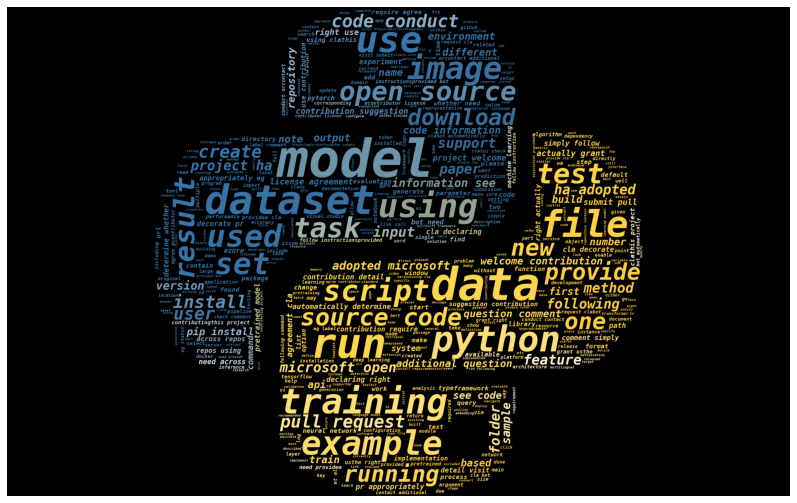

In [132]:
plt.figure(figsize=(16, 9))


mask = np.array(Image.open('python logo.jpeg'))
image_colors = ImageColorGenerator(mask)
img = WordCloud(background_color="black", font_path=font_path, mask=mask, 
                max_words=500, stopwords=STOPWORDS, max_font_size=256,
                random_state=42, width=1200, height=1200, color_func=image_colors).generate(python_words)
plt.imshow(img)

plt.axis('off')
plt.show()

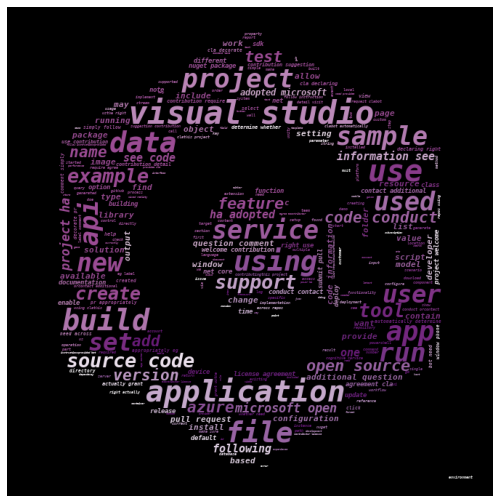

In [133]:
plt.figure(figsize=(16, 9))


mask = np.array(Image.open('C_sharp.jpeg'))
image_colors = ImageColorGenerator(mask)
img = WordCloud(background_color="black", font_path=font_path, mask=mask, 
                max_words=500, stopwords=STOPWORDS, max_font_size=128,
                random_state=42, width=1200, height=1200, color_func=image_colors).generate(c_sharp_words)
plt.imshow(img)

plt.axis('off')
plt.show()

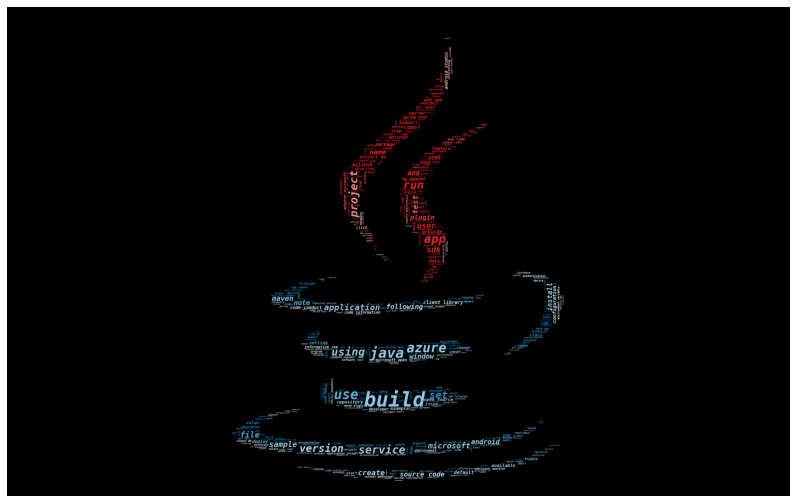

In [134]:
plt.figure(figsize=(16, 9))


mask = np.array(Image.open('Java-Emblem.jpeg'))
image_colors = ImageColorGenerator(mask)
img = WordCloud(background_color="black", font_path=font_path, mask=mask, 
                max_words=500, stopwords=STOPWORDS, max_font_size=256,
                random_state=42, width=1200, height=1200, color_func=image_colors).generate(java_words)
plt.imshow(img)

plt.axis('off')
plt.show()

In [ ]:
all_words = ' '.join(df.lemmed_readme)

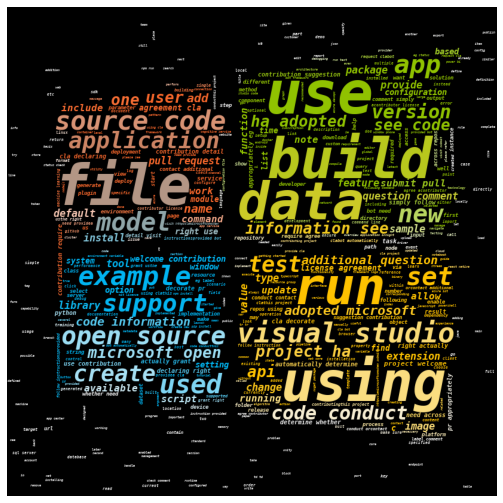

In [136]:
plt.figure(figsize=(16, 9))


mask = np.array(Image.open('LOGO.jpeg'))
image_colors = ImageColorGenerator(mask)
img = WordCloud(background_color="black", font_path=font_path, mask=mask, 
                max_words=500, stopwords=STOPWORDS, max_font_size=100,
                random_state=42, width=1200, height=1200, color_func=image_colors).generate(all_words)
plt.imshow(img)

plt.axis('off')
plt.show()

In [158]:
bigrams_python = nltk.ngrams(python_words.split(), 2)

In [159]:
bigrams_python

<generator object ngrams at 0x7f95ac284120>

In [160]:
top_20_py_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

top_20_py_bigrams.head()

(e,  )    22081
(i, n)    17444
(o, n)    14812
(t,  )    14685
(r, e)    12378
dtype: int64

In [164]:
bigrams_c_sharp = nltk.ngrams(c_sharp_words.split(), 2)

In [165]:
bigrams_c_sharp

<generator object ngrams at 0x7f95abe39510>

In [179]:
top_20_c_bigrams = (pd.Series(nltk.ngrams(c_sharp_words, 2))
                      .value_counts()
                      .head(20))

top_20_c_bigrams

(e,  )    40460
(t,  )    25736
(i, n)    25035
(o, n)    23875
( , s)    20887
(r, e)    20741
( , c)    19971
(e, r)    19847
(t, i)    19422
(n,  )    17269
(d,  )    17119
(a, t)    16729
(t, e)    16693
(i, o)    15527
( , a)    15495
(c, o)    15155
(e, n)    14941
(s, t)    14385
(s, e)    14234
(d, e)    13943
dtype: int64

In [175]:
bigrams_java = nltk.ngrams(java_words.split(), 2)

In [176]:
bigrams_java

<generator object ngrams at 0x7f95288b4820>

In [177]:
top_20_java_bigrams = (pd.Series(nltk.ngrams(bigrams_java, 2))
                      .value_counts()
                      .head(20))

top_20_java_bigrams.head()

((microsoft, open), (open, source))          31
((open, source), (source, code))             31
((information, see), (see, code))            28
((see, code), (code, conduct))               28
((code, information), (information, see))    28
dtype: int64

In [195]:
df.dropna(inplace=True)

In [196]:
train, validate, test = util.split_dataframe(df)

In [197]:
print(train.shape)
print(validate.shape)
print(test.shape)

(1064, 4)
(457, 4)
(381, 4)


In [198]:
# Setup our X variables
X_train = train.lemmed_readme
X_validate = validate.lemmed_readme
X_test = test.lemmed_readme

In [199]:
# Setup our y variables
y_train = train.language
y_validate = validate.language
y_test = test.language

In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [201]:
# create the vectorized object
tfidf = TfidfVectorizer()

# fir the vectorized object onto train
tfidf.fit(X_train)

TfidfVectorizer()

In [202]:
# set up on the training data
X_train_vectorized = tfidf.transform(X_train)
X_validate_vectorized = tfidf.transform(X_validate)
X_test_vectorized = tfidf.transform(X_test)

In [203]:
X_train_vectorized.todense().shape

(1064, 47183)

In [204]:
# make the actual outcomes
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

# Pre-Modeling

In [208]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [228]:
# Create a parameter dictionary for the model, {'parameter': [list of settings]}
parameters = [
    {
    'penalty': ['l2'],
    'C': [10],
    },
]
# Created variable model which holds the KNN model
model = LogisticRegression()

# Create grid_search model, looking at recall
grid_search = GridSearchCV(model,
                           param_grid=parameters,
                           cv=5,
                           scoring='accuracy',
                           )

# Create variable r that hold the FIT grid_search
r = grid_search.fit(X_train_vectorized, y_train)
scores = r.cv_results_
lm = r.best_estimator_


In [229]:
# Returns max value of the mean test score 
max(scores['mean_test_score'])

0.5667596775622287

In [230]:
# loop that runs all of the possible parameter configurations from the parameter dictionary above
for mean_score, params in sorted(list(zip(scores["mean_test_score"], scores["params"])),key = lambda x: x[0]):
     print(mean_score, params)

0.5667596775622287 {'C': 10, 'penalty': 'l2'}


## Logistic Regression